<a href="https://colab.research.google.com/github/marcusnk237/Human-Activity-recognition-using-ECG/blob/main/Human_Activity_recognition_using_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gc,os,sys,re,glob
from scipy import signal
from pathlib import Path
from tensorflow import keras
!pip install shap
import shap
shap.initjs()
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
import random
from random import choice
import matplotlib.pyplot as plt
from scipy import signal
from statistics import mean
import itertools
import logging
import matplotlib.collections as mcoll
from sklearn.utils import resample,shuffle
from scipy import stats
from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold,RepeatedStratifiedKFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
import pickle
# Generate and plot a synthetic imbalanced classification dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.utils import shuffle
mpl.style.use('seaborn')
#### Import libraries
# Set random seed
!pip install tensorflow_addons
import cv2
import gc
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from scipy import signal
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow_addons.optimizers import CyclicalLearningRate
from tensorflow.keras import Model,Sequential,regularizers
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
np.random.seed(123)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.5 MB/s eta 0:00:00


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.5 MB/s eta 0:00:00




TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats('svg')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix_har.tif'.format(title), format='tif', dpi=300)

In [ ]:
#################Version 2#######################################
def get_xrcrnet_model(im_shape):
  def residual_block(X, kernels, stride , flags):
    out = keras.layers.Conv1D(kernels, stride, padding='same')(X)
    out = keras.layers.LeakyReLU(1)(out)
    out = keras.layers.BatchNormalization()(out)
    out = keras.layers.Dropout(0.5)(out)
    out = keras.layers.Conv1D(kernels, stride, padding='same')(out)
    out = keras.layers.add([X, out])
    out = keras.layers.LeakyReLU(1)(out)
    out = keras.layers.BatchNormalization()(out)
    out = keras.layers.LSTM(kernels,return_sequences=True)(out)

    out = keras.layers.MaxPool1D(2, 2)(out)
    return out

  kernels = 32
  stride = 5

  inputs = keras.layers.Input(im_shape)
  X = keras.layers.Conv1D(kernels, stride)(inputs)
  X = keras.layers.BatchNormalization()(X)
  X = residual_block(X, kernels, stride , False)
  X = residual_block(X, kernels, stride , False)
  X = residual_block(X, kernels, stride , False)
  X = residual_block(X, kernels, stride , False)
  X = residual_block(X, kernels, stride , False)
  X = keras.layers.Flatten()(X)
  X = keras.layers.Dense(kernels)(X)
  X = keras.layers.LeakyReLU(1)(X)
  X = keras.layers.Dense(kernels)(X)
  X = keras.layers.LeakyReLU(1)(X)
  output = keras.layers.Dense(3, activation='softmax')(X)

  model = keras.Model(inputs=inputs, outputs=output)
  return model

In [ ]:

df=pd.read_csv('/content/har_ecg.csv')
df = shuffle(df)
df.reset_index(drop=True, inplace=True)
print(df.isnull().sum().sum())
print(df)


0
       33449.822833304745  32702.51508070412  32407.748862734064  \
0            33088.936633       40326.340802        39140.526976   
1            29086.752202       28691.583791        29175.025199   
2            32174.135289       33244.685394        33079.068815   
3            30975.294632       29816.312026        31124.245618   
4            36186.023686       37407.697904        37517.306262   
...                   ...                ...                 ...   
61925        35957.471929       39101.722812        38387.638329   
61926        39624.568025       33795.517587        24012.580975   
61927        25349.826015       21581.035890        22728.425476   
61928        35212.516259       35801.101729        35066.316494   
61929        29682.030348       27107.379575        27107.719632   

       32564.09753980604  34823.766479675694  36835.384807398485  \
0           40212.124148        38676.640326        38247.009041   
1           28173.182148        27106.963076 

In [ ]:
activity = ['sit','walk','run']

In [ ]:
ECG=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y=y.astype(int)

In [ ]:
X = []
for i in range(len(ECG)):
  ecg  = (ECG[i]-np.min(ECG[i]))/(np.max(ECG[i])-np.min(ECG[i]))
  X.append(ecg)

In [ ]:
X = np.array(X)

In [ ]:
Counter(y)

Counter({2: 19709, 1: 21575, 0: 20646})

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
shufflesplit = StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
N=X_train.shape[0]
batch_size = 16* tpu_strategy.num_replicas_in_sync
iterations = N/batch_size
step_size= 2 * iterations
def scale_fn(x):
  return tf.pow(0.95,x)

lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=scale_fn,scale_mode='cycle')
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
with tpu_strategy.scope():
        xrcrnet_model = get_xrcrnet_model((X_train.shape[1],1)) # Instanciate model

In [ ]:
for i, (train_idx, test_idx) in enumerate(shufflesplit.split(X, y)):
  print(i)
  N=X[train_idx].shape[0]
  batch_size = 16* tpu_strategy.num_replicas_in_sync
  iterations = N/batch_size
  step_size= 2 * iterations
  lr_schedule = CyclicalLearningRate(1e-6, 1e-3, step_size=step_size, scale_fn=lambda x: tf.pow(0.95,x))
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  with tpu_strategy.scope():
        xrcrnet_model = get_xrcrnet_model((X[train_idx].shape[1],1)) # Instanciate model
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2) # Early stopping parameters
        class_weights = compute_class_weight(class_weight='balanced',
                classes=np.unique(y[train_idx]),
                y=y[train_idx])
        indexs=[0,1,2]
        w = dict(zip(indexs,class_weights))
        save_best_weights = ModelCheckpoint(filepath="har_ecg_model_fold_{}.h5".format(i), verbose=2, save_best_only=True , restore_best_weights=True) # Model checkpoint parameters
        xrcrnet_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Model compiling
  history_xrcrnet_model = xrcrnet_model.fit(X[train_idx],y[train_idx], validation_data=(X[test_idx], y[test_idx]),class_weight=w, batch_size=batch_size, epochs=100, shuffle=False,callbacks=[save_best_weights,early_stopping])
  xrcrnet = xrcrnet_model.evaluate(X[test_idx], y[test_idx])
  np.save("xhar_ecg__model_fold_{}.npy".format(i),history_xrcrnet_model)

0
Epoch 1/100
388/388 [==============================] - ETA: 0s - loss: 0.9052 - accuracy: 0.5306
Epoch 1: val_loss improved from inf to 2.39897, saving model to har_ecg_model_fold_0.h5
388/388 [==============================] - 74s 126ms/step - loss: 0.9052 - accuracy: 0.5306 - val_loss: 2.3990 - val_accuracy: 0.3672
Epoch 2/100
388/388 [==============================] - ETA: 0s - loss: 0.6063 - accuracy: 0.6915
Epoch 2: val_loss improved from 2.39897 to 0.51943, saving model to har_ecg_model_fold_0.h5
388/388 [==============================] - 34s 88ms/step - loss: 0.6063 - accuracy: 0.6915 - val_loss: 0.5194 - val_accuracy: 0.7388
Epoch 3/100
388/388 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.7628
Epoch 3: val_loss did not improve from 0.51943
388/388 [==============================] - 33s 86ms/step - loss: 0.4697 - accuracy: 0.7628 - val_loss: 0.5288 - val_accuracy: 0.7195
Epoch 4/100
388/388 [==============================] - ETA: 0s - loss: 0.3936 - 

In [ ]:
for i in range(10):
  print('*'*30+'Model {}'.format(i)+'*'*30)
  xrcrnet_model.load_weights("har_ecg_model_fold_{}.h5".format(i))
  xrcrnet = xrcrnet_model.evaluate(X_test, y_test) # Evaluate model
  print('*'*40)

******************************Model 0******************************
388/388 [==============================] - 19s 27ms/step - loss: 0.0305 - accuracy: 0.9897
****************************************
******************************Model 1******************************
388/388 [==============================] - 10s 23ms/step - loss: 0.0620 - accuracy: 0.9741
****************************************
******************************Model 2******************************
388/388 [==============================] - 10s 24ms/step - loss: 0.0264 - accuracy: 0.9902
****************************************
******************************Model 3******************************
388/388 [==============================] - 10s 24ms/step - loss: 0.0463 - accuracy: 0.9830
****************************************
******************************Model 4******************************
388/388 [==============================] - 10s 24ms/step - loss: 0.0259 - accuracy: 0.9910
****************************************


In [ ]:
xrcrnet_model.load_weights("har_ecg_model_fold_6.h5")

388/388 [==============================] - 8s 19ms/step


`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


Confusion matrix, without normalization
[[4118    0    3]
 [  15 4277   55]
 [   3   33 3882]]


,precision,recall,f1-score,support
sit/stand,0.999272,0.995648,0.997457,4136
walk,0.983897,0.992343,0.988102,4310
run,0.990812,0.985279,0.988038,3940
accuracy,0.991200,0.991200,0.991200,0
macro avg,0.991327,0.991090,0.991199,12386
weighted avg,0.991231,0.991200,0.991205,12386


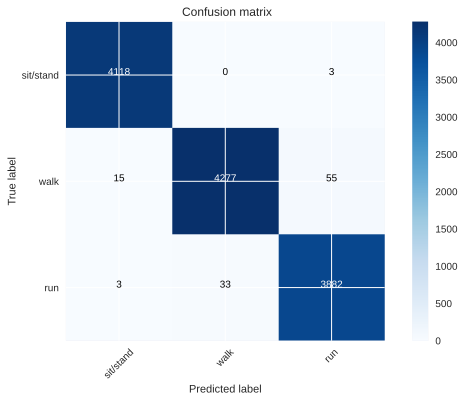

In [ ]:
y_pred = tf.argmax(xrcrnet_model.predict(X_test), axis=-1)
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Classification report
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sit/stand','walk','run'],title=' Confusion matrix')
df_class_r = pd.DataFrame(classification_report(y_pred, y_test, digits=2,output_dict=True)).T
df_class_r['support'] = df_class_r.support.apply(int)
df_class_r.rename(index={'0':'sit/stand', '1':'walk', '2':'run'}, inplace=True)
df_r= df_class_r
df_r.style.background_gradient(cmap='viridis')

In [ ]:
xrcrnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 512, 1)]     0           []                               
                                                                                                  
 conv1d_33 (Conv1D)             (None, 508, 32)      192         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_33 (BatchN  (None, 508, 32)     128         ['conv1d_33[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv1d_34 (Conv1D)             (None, 508, 32)      5152        ['batch_normalization_33[0]

In [ ]:
y_test_list=[i for i in y_test]
sit=[i for i in range(len(y_test)) if y_test[i]==0]
walk=[i for i in range(len(y_test)) if y_test[i]==1]
run=[i for i in range(len(y_test)) if y_test[i]==2]

In [ ]:
from skimage.transform import resize
def compute_cam(model, image , layer_name , eps=1e-8):
        # Step 4 we find the gradients of the target class score yc with respect to the feature maps Ak
        # of the last convolutional layer
        grad_model = tf.keras.models.Model(inputs=[model.inputs],
                                           outputs=[model.get_layer(layer_name).output, model.output])

        with tf.GradientTape() as tape:
            inputs = np.expand_dims(image,axis=0)
            conv_outs, predictions = grad_model(inputs)
            class_idx = tf.argmax(predictions[0])
            y_c = predictions[:, class_idx]

        # compute the gradient of the score for the class c, with respect to feature maps Ak of a convolutional layer
        batch_grads = tape.gradient(y_c, conv_outs)
        grads = batch_grads[0]
        first = tf.exp(y_c) * grads
        second = tf.exp(y_c) * tf.pow(grads, 2)
        third = tf.exp(y_c) * tf.pow(grads, 3)
        global_sum = tf.reduce_sum(tf.reshape(conv_outs[0], shape=(-1, first.shape[1])), axis=0)
        alpha_num = second
        alpha_denom = second * 2.0 + third * tf.reshape(global_sum, shape=(1,1,first.shape[1]))
        alpha_denom = tf.where(alpha_denom != 0.0, alpha_denom, tf.ones(shape=alpha_denom.shape))
        alphas = alpha_num / alpha_denom
        weights = tf.maximum(first, 0.0)
        alpha_normalization_constant = tf.reduce_sum(tf.reduce_sum(alphas, axis=0), axis=0)
        alphas /= tf.reshape(alpha_normalization_constant, shape=(1,1,first.shape[1]))
        alphas_thresholding = np.where(weights, alphas, 0.0)

        alpha_normalization_constant = tf.reduce_sum(tf.reduce_sum(alphas_thresholding, axis=0),axis=0)
        alpha_normalization_constant_processed = tf.where(alpha_normalization_constant != 0.0, alpha_normalization_constant,
                                                          tf.ones(alpha_normalization_constant.shape))

        alphas /= tf.reshape(alpha_normalization_constant_processed, shape=(1,1,first.shape[1]))
        deep_linearization_weights = tf.reduce_sum(tf.reshape((weights*alphas), shape=(-1,first.shape[1])), axis=0)
        grad_CAM_map = tf.reduce_sum(deep_linearization_weights * conv_outs[0], axis=-1)
        cam = np.maximum(grad_CAM_map, 0)
        cam = cam / np.max(cam)
        return cam

In [ ]:
def multicolored_lines(x,y,heatmap,title_name):
    fig, ax = plt.subplots()
    lc = colorline(x, y, heatmap,cmap='rainbow')
    clb = plt.colorbar(lc)
    clb.ax.tick_params(labelsize=12)
    clb.ax.set_title('Gradient value',fontsize=12)
    lc.set_linewidth(2)
    lc.set_alpha(0.8)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.title(title_name)
    plt.grid(False)
    plt.savefig('{}.tif'.format(title_name), format='tif', dpi=300)
    plt.show()

def colorline(x, y, heatmap,cmap='rainbow'):
    z = np.array(heatmap)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap)
    ax = plt.gca()
    ax.add_collection(lc)
    return lc


In [ ]:
layer_name = "max_pooling1d_19"

1/1 [==============================] - 1s 547ms/step


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


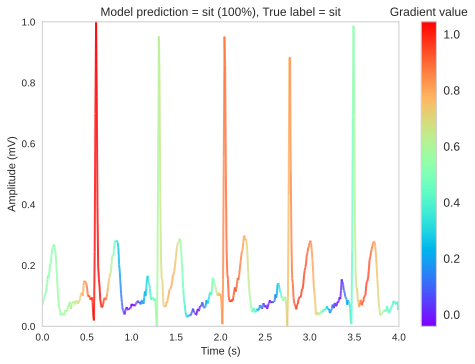

In [ ]:
i=11
for i in [sit[i]]: #3
        pred = xrcrnet_model.predict(np.expand_dims(X_test[i],axis=0))
        index=np.argmax(pred[0])
        heatmap=[]
        heatmap.append(compute_cam(xrcrnet_model, X_test[i] , layer_name, eps=1e-8).tolist())
        plt.style.use("seaborn-whitegrid")
        big_heatmap_norm = cv2.resize(np.array(heatmap), dsize=(X_test[i].shape[0], 300),interpolation=cv2.INTER_CUBIC)
        x = np.linspace(0, 4, X_test[i].shape[0])
        multicolored_lines(x,X_test[i],big_heatmap_norm[0],f"Model prediction = {activity[index]} ({round(pred[0][index]*100)}%), True label = {activity[int(y_test[i])]}")

1/1 [==============================] - 1s 542ms/step


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


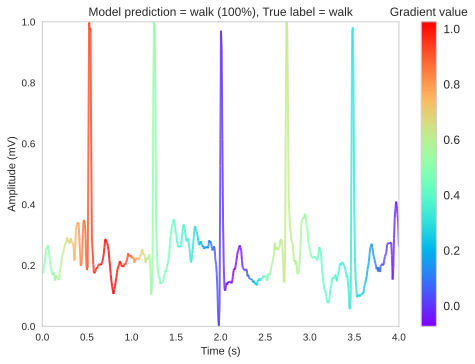

In [ ]:
i=1100
for i in [walk[i]]: #3
        pred = xrcrnet_model.predict(np.expand_dims(X_test[i],axis=0))
        index=np.argmax(pred[0])
        heatmap=[]
        heatmap.append(compute_cam(xrcrnet_model, X_test[i] , layer_name, eps=1e-8).tolist())
        plt.style.use("seaborn-whitegrid")
        big_heatmap_norm = cv2.resize(np.array(heatmap), dsize=(X_test[i].shape[0], 300),interpolation=cv2.INTER_CUBIC)
        x = np.linspace(0, 4, X_test[i].shape[0])
        multicolored_lines(x,X_test[i],big_heatmap_norm[0],f"Model prediction = {activity[index]} ({round(pred[0][index]*100)}%), True label = {activity[int(y_test[i])]}")

1/1 [==============================] - 1s 563ms/step


The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


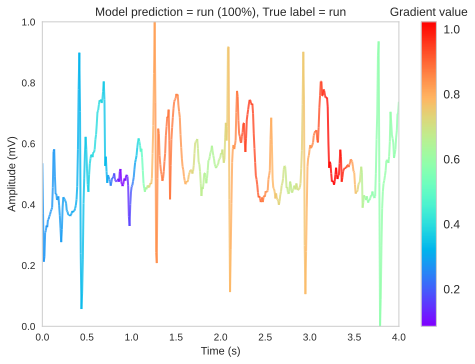

In [ ]:
i=1
for i in [run[i]]: #3
        pred = xrcrnet_model.predict(np.expand_dims(X_test[i],axis=0))
        index=np.argmax(pred[0])
        heatmap=[]
        heatmap.append(compute_cam(xrcrnet_model, X_test[i] , layer_name, eps=1e-8).tolist())
        plt.style.use("seaborn-whitegrid")
        big_heatmap_norm = cv2.resize(np.array(heatmap), dsize=(X_test[i].shape[0], 300),interpolation=cv2.INTER_CUBIC)
        x = np.linspace(0, 4, X_test[i].shape[0])
        multicolored_lines(x,X_test[i],big_heatmap_norm[0],f"Model prediction = {activity[index]} ({round(pred[0][index]*100)}%), True label = {activity[int(y_test[i])]}")